In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
#ds = xr.open_mfdataset('FXSD/FXSD_f19_f19_mg16_2015to2020.cam.h2.2015-03-16-*.nc')
archive_dir = '/glade/scratch/marsh/archive/'
case = 'f.e21.FX2000.f19_f19_mg16.001'
ds = xr.open_mfdataset(archive_dir+case+'/atm/hist/*h1.*.nc')

In [3]:
#select a particule location and pressure level
ilat = 80 # index for latitude cell
ilon = 70 # index for longitude cell
ilev = 20 # pressure level

#extract WACCM-X variables at that location
e = ds['e'].isel(lat=ilat,lon=ilon,lev=ilev)
t = ds['T'].isel(lat=ilat,lon=ilon,lev=ilev)
z3 = ds['Z3'].isel(lat=ilat,lon=ilon,lev=ilev)
Ui = ds['UI'].isel(lat=ilat,lon=ilon,lev=ilev)
Vi = ds['VI'].isel(lat=ilat,lon=ilon,lev=ilev)
U = ds['U'].isel(lat=ilat,lon=ilon,lev=ilev)
V = ds['V'].isel(lat=ilat,lon=ilon,lev=ilev)
ti = ds['TIon'].isel(lat=ilat,lon=ilon,lev=ilev)
te = ds['TElec'].isel(lat=ilat,lon=ilon,lev=ilev)

In [4]:
ds

<xarray.Dataset>
Dimensions:          (mlat: 97, mlon: 80, lat: 96, lon: 144, time: 121, lev: 126, ilev: 127, nbnd: 2)
Coordinates:
  * mlat             (mlat) float64 -90.0 -88.12 -86.24 ... 86.24 88.12 90.0
  * mlon             (mlon) float64 -180.0 -175.5 -171.0 ... 166.5 171.0 175.5
  * lat              (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon              (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lev              (lev) float64 4.055e-10 5.207e-10 6.686e-10 ... 970.6 992.6
  * ilev             (ilev) float64 3.551e-10 4.559e-10 ... 985.1 1e+03
  * time             (time) object 0001-01-01 00:00:00 ... 0001-01-06 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/53)
    gw               (time, lat) float64 dask.array<chunksize=(24, 96), meta=np.ndarray>
    hyam             (time, lev) float64 dask.array<chunksize=(24, 126), meta=np.ndarray>
    hybm             (time, lev) float64 dask.array<chunksize=(24, 126), meta=np.ndarray>
    P0               (time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai             (time, ilev) float64 dask.array<chunksize=(24, 127), meta=np.ndarray>
    hybi             (time, ilev) float64 dask.array<chunksize=(24, 127), meta=np.ndarray>
    ...               ...
    UI               (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    V                (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    VI               (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    WI               (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    Z3               (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    e                (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              f.e21.FX2000.f19_f19_mg16.001
    logname:           marsh
    host:              cheyenne1
    initial_file:      /glade/p/cesmdata/cseg/inputdata/atm/waccm/ic/f.c54137...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gto...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1

In [5]:
# assign constants
kboltz = 1.380649e-23 # (J/K)

# calculate total density n = P/(kT)
Pa = ds['lev'][ilev] * 1e2
den = Pa*1e-6/(t*kboltz) # cm^-3

In [6]:
# convert electron density vmr to number density (/cm3)
eden = e*den

# convert z3 (m) to geometric altidue (km)
r = 6371. # radius of the earth
z3km = z3*1e-3 #convert m to km
zkm = r * z3km / (r - z3km) #account for drop off in gravity

zkm.plot()

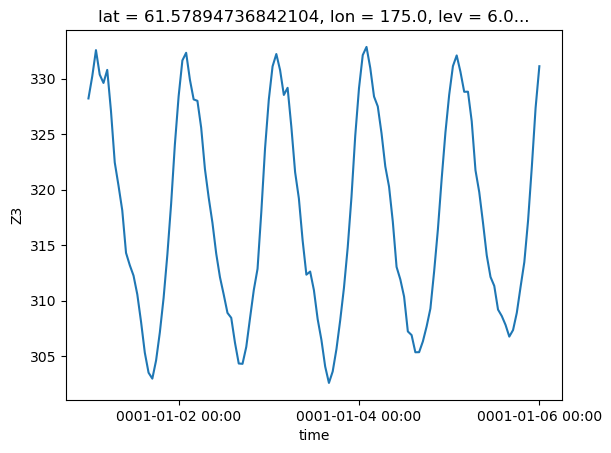

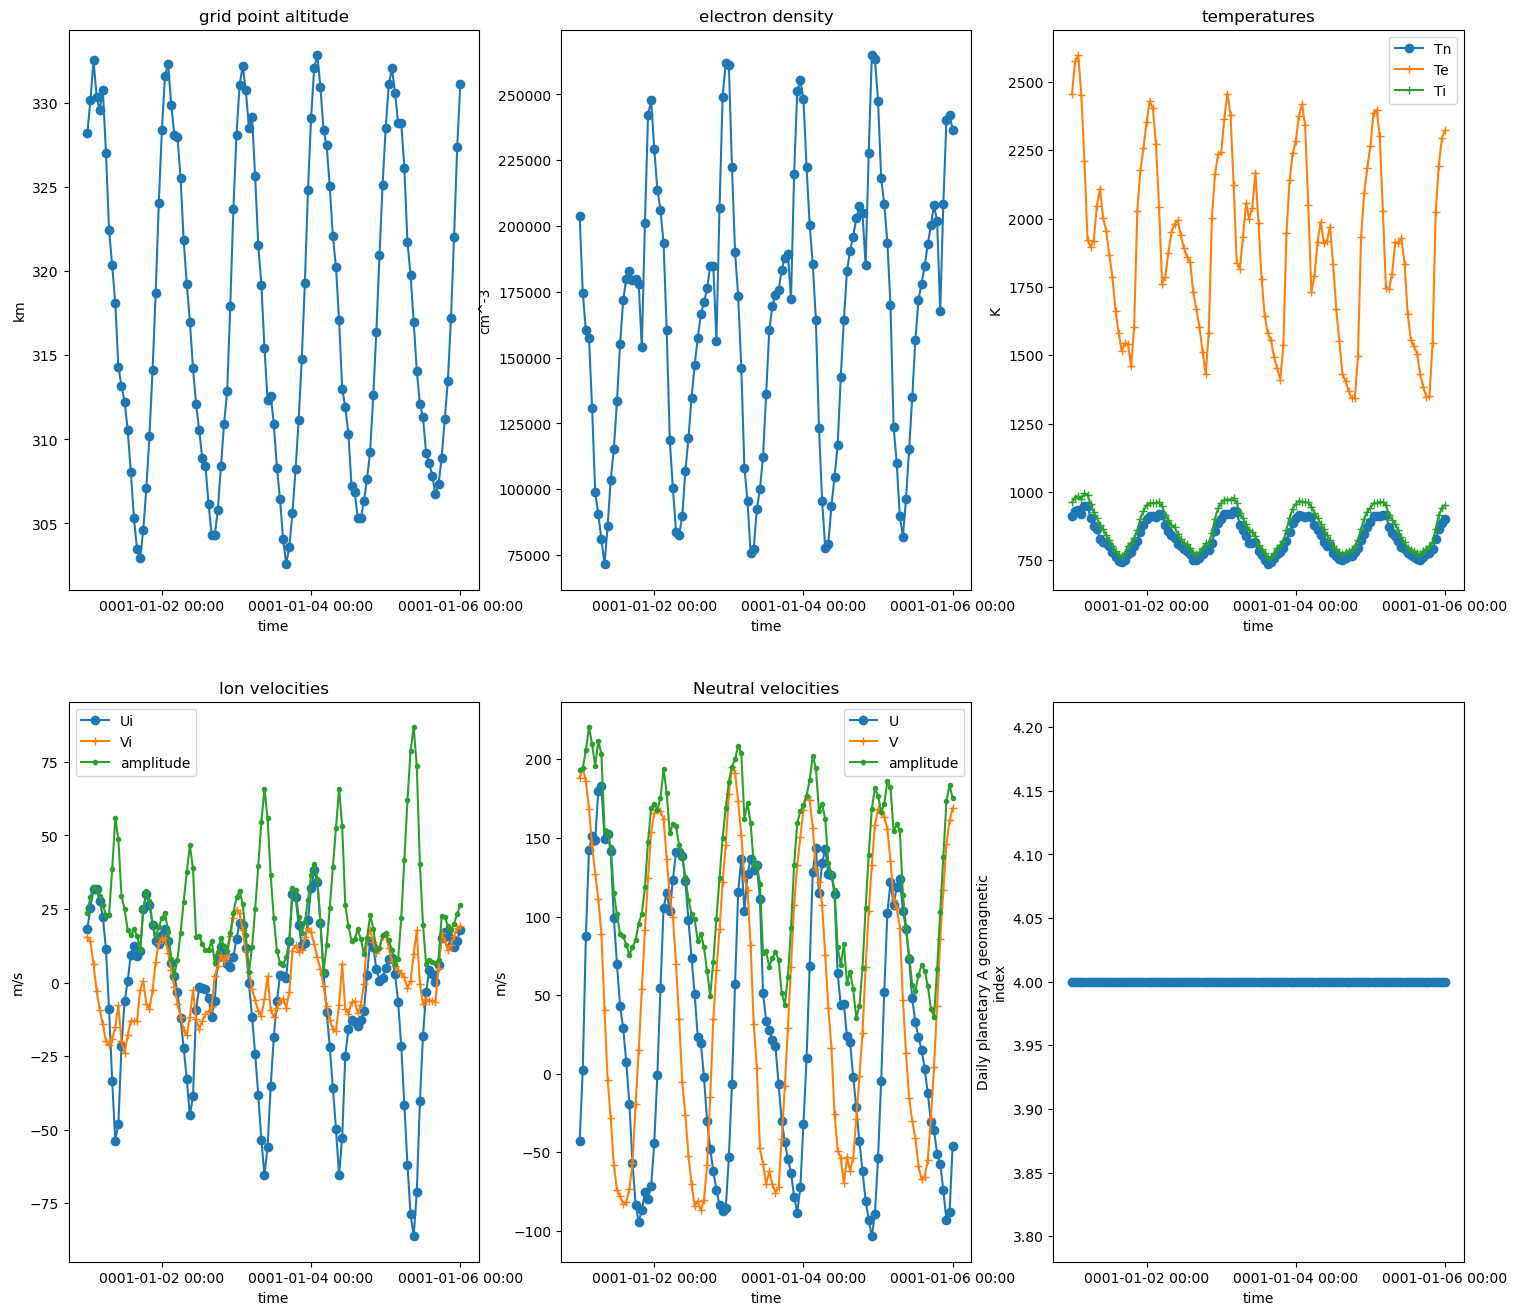

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,16))

plt.subplot(2, 3, 1)

zkm.plot(marker='o')
ax = plt.gca()
ax.set_title("grid point altitude")
ax.set_ylabel("km")

plt.subplot(2, 3, 2)

eden.plot(marker='o')
ax = plt.gca()
ax.set_title("electron density")
ax.set_ylabel("cm^-3")

plt.subplot(2, 3, 3)

t.plot(marker='o', label='Tn')
te.plot(marker='+', label='Te')
ti.plot(marker='+', label='Ti')
ax = plt.gca()
ax.set_title("temperatures")
ax.set_ylabel("K")
ax.legend()

plt.subplot(2, 3, 4)

Ui.plot(marker='o', label='Ui')
Vi.plot(marker='+', label='Vi')
amp = np.sqrt(Ui*Ui + Vi*Vi)
amp.plot(marker='.', label = 'amplitude')
ax = plt.gca()
ax.set_title("Ion velocities")
ax.set_ylabel("m/s")
ax.legend()

plt.subplot(2, 3, 5)

U.plot(marker='o', label='U')
V.plot(marker='+', label='V')
amp = np.sqrt(U*U + V*V)
amp.plot(marker='.', label = 'amplitude')
ax = plt.gca()
ax.set_title("Neutral velocities")
ax.set_ylabel("m/s")
ax.legend()

plt.subplot(2, 3, 6)

ds['ap'].plot(marker='o')

plt.show()

In [8]:
ds['U'].isel(lat=ilat,lon=ilon).plot(figsize=(14,6),yincrease=False, y='lev', yscale='log', ylim=(.0001,1e-9))

In [9]:
ds['V'].isel(lat=ilat,lon=ilon).plot(figsize=(14,6),yincrease=False, y='lev', yscale='log', ylim=(.0001,1e-9))

In [10]:
ds['QJOULE'].isel(lat=ilat,lon=ilon).plot(figsize=(14,6),yincrease=False, y='lev', yscale='log', ylim=(.0001,1e-9)) 

KeyError: 'QJOULE'

In [ ]:
ds['EX'].isel(lat=ilat,lon=ilon,lev=ilev).plot(figsize=(14,6),label='EX')
ds['EY'].isel(lat=ilat,lon=ilon,lev=ilev).plot(label='EY')
ax = plt.gca()
ax.legend()
plt.show()

In [ ]:
ds['EZ'].isel(lat=ilat,lon=ilon).plot(figsize=(14,6),yincrease=False, y='lev', yscale='log', ylim=(.0001,1e-9))